# Step1. OpenCV and object detection

## 1.1. Video capturing

In [ ]:
import cv2
import numpy as np

In [ ]:
cap = cv2.VideoCapture(0)

In [ ]:
while True:
    ret, frame= cap.read() # Forever it returns the frame and ret which is false or true
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #if you want to convert the color
    cv2.imshow('frame', frame)
    cv2.imshow('gray', gray) # to show the gray video

    if cv2.waitKey(1) & 0xFF == ord('q'): # If q is pressed stop
        break

In [ ]:
cap.release()
cv2.destroyAllWindows()

### Q1- Try to understand each line of the code and explain it in your report.

cap is a variable to which we assign the input from the camera. while true loop keeps the camera open for until we stop it with a break command ret, frame are two outputs of cap.read() where frame is the pictures from the camera and ret is a boolian that indicates if camera is working properly. cv2.cvtColor() converts the color of the pictures to gray cv2.imshow() commands show the outputs finally if statement indicates when q is pressed break the loop

cap.release() command releases the camera cv2.destroyAllWindows() closes the windows where pictures were being shown.

## 1.2. Digit recognition

In [ ]:
import tensorflow
new_model = tensorflow.keras.models.load_model('/my_model.h5')

In [ ]:
def get_img_contour_thresh(img): # Function to create boundaries around the image we're reading, and to create a contour
    x, y, w, h = 0, 0, 300, 300 # coordinates and size of the portion of the image we want to analyze
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (35, 35), 0)
    ret, thresh1 = cv2.threshold(blur, 70, 255, cv2.THRESH_BINARY_INV +
    cv2.THRESH_OTSU)
    thresh1 = thresh1[y:y + h, x:x + w]
    contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE,
    cv2.CHAIN_APPROX_SIMPLE)[-2:]
    return img, contours, thresh1


In [ ]:
cap = cv2.VideoCapture(0) # Opeining the camera and reading its input

while (cap.isOpened()):
    ret, img = cap.read() # Reading data from cap variable
    ret
    img, contours, thresh = get_img_contour_thresh(img) # Creating the threshold around the image
    ans1 = ''
    if len(contours) > 0:
        contour = max(contours, key=cv2.contourArea)
        if cv2.contourArea(contour) > 2500:
            # print(predict(w_from_model,b_from_model,contour))
            x, y, w, h = cv2.boundingRect(contour)
            # newImage = thresh[y - 15:y + h + 15, x - 15:x + w +15]
            newImage = thresh[y:y + h, x:x + w]
            newImage = cv2.resize(newImage, (28, 28)) # Converting image dimentions to our training data dimentions
            newImage = np.array(newImage)
            newImage = newImage.flatten()
            newImage = newImage.reshape(newImage.shape[0], 1) # Converting the image to 784 by 1
            newImage2 = newImage.flatten().reshape(1,28,28,1) # Flattening the image data
            newImage2 = newImage2.astype('float32')
            newImage2 /= 255 # normalizing the data
            result = new_model.predict(newImage2)
            ans1= np.argmax(result)
            #ans1 = Digit_Recognizer_LR.predict(w_LR, b_LR, newImage)



    x, y, w, h = 0, 0, 300, 300
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(img, "Prediction : " + str(ans1), (10, 320),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    cv2.imshow("Frame", img)
    cv2.imshow("Contours", thresh)
    k = cv2.waitKey(10)
    if k == 27:
        break

In [ ]:
cap.release()
cv2.destroyAllWindows()

## 1.3. Face recognition

In [ ]:
import cv2


face_cascade = cv2.CascadeClassifier('C:/Users/uvata/OneDrive/Documents/Harrisbug University/Analytics/Machine Learning II/Exec session3 - Lab 3/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Users/uvata/OneDrive/Documents/Harrisbug University/Analytics/Machine Learning II/Exec session3 - Lab 3/haarcascade_eye.xml')

cap = cv2.VideoCapture(0)

while True:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            for (ex,ey,ew,eh) in eyes:
                cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    cv2.imshow('Lab 3 Face recognition',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows() 

# Escape stops the code

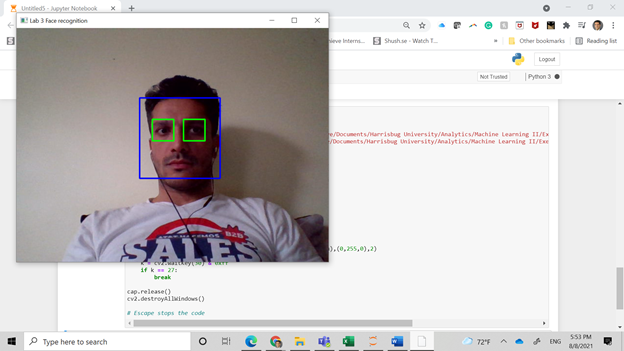

### Q2- Use the code provided (mnist-cnn) to design a digit recognition but this time read the image of the number directly from your webcam.

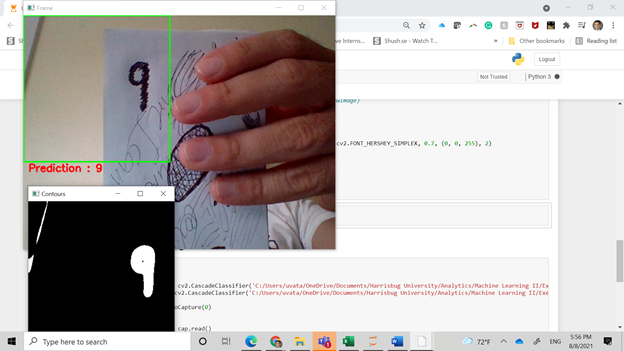

# Step2. RNN and text classification

In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
np.random.seed(7)

In [ ]:
# Just load 5000 cases 

top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

### Q3- We need to do word embedding at this point. What is the meaning of “word embedding” in context of NLP?

Word embeddings is a technique where individual words of a domain or language are represented as real-valued vectors in a lower dimensional space instead of a sparse matrix which takes too much computational power for neural networks to process. In addition, lack of meaningful relationship (an issue of bag of words method) is solved by placing vectors of semantically similar items close to each other. This way words that have similar meaning have similar distances in the vector space as shown below.

In [ ]:
from tensorflow.keras.layers import Embedding

# design model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
hist= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           160000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
391/391 [==============================] - 24s 42ms/step - loss: 0.5293 - accuracy: 0.7131 - val_loss: 0.3627 - val_accuracy: 0.8456
Epoch 2/20
391/391 [==============================] - 16s 40ms/step - loss: 0.3280 - accuracy: 0.8637 - val_loss: 0.3741 - val_accuracy: 0.8504
Epoch 3/20
391/391 [==============================] - 16s 41ms/step - loss: 0.3017 - ac

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 84.80%


# Q4- Draw the learning curves and describe them.

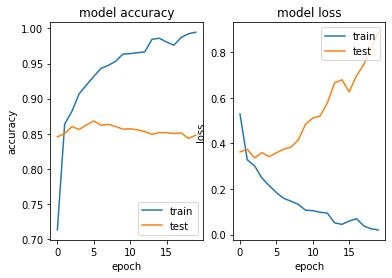

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

As we see in the accuracy and loss plots, the test data does not quite follow the the training data and that shows our model is overfitting which we need to fix

# Q5- Add a dropout to see how the model changes.

In [ ]:
# design model with a dropout layer
from tensorflow.keras.layers import Dropout

embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Dropout(.25)) # Dropout layer with 25% neuron dropout
model.add(LSTM(100))
model.add(Dropout(.25)) # Dropout layer with 25% neuron dropout
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
hist= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
dropout (Dropout)            (None, 500, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
391/391 [==============================] - 17s 41ms/step - loss: 0.5023 - accuracy: 0.7444 - val_l

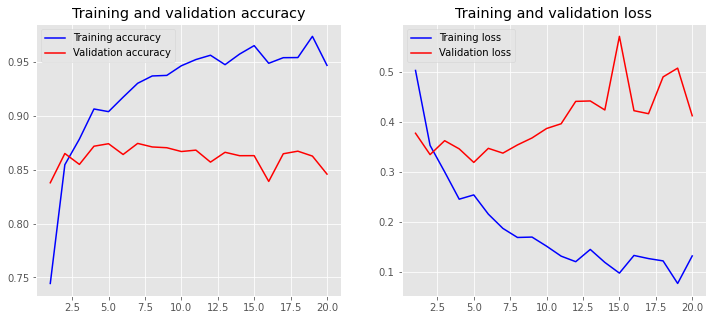

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training accuracy')
    plt.plot(x, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()


plot_history(hist)

Adding dropout of 25% after embedding layer and another dropout of 25% after the LSTM layer did not help with overfitting

### Q6- Add the CNN layer and evaluate the model

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras import regularizers

# fix random seed for reproducibility
np.random.seed(7)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
#model.add(Dropout(.25)) # Dropout layer with 25% neuron dropout
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu', use_bias=True, kernel_regularizer = regularizers.l1( l=0.001)))
model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(.25)) # Dropout layer with 25% neuron dropout
model.add(LSTM(100))
#model.add(Dropout(.25)) # Dropout layer with 25% neuron dropout
model.add(Dense(1, activation='sigmoid',use_bias=True, kernel_regularizer = regularizers.l1( l=0.001)))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
hist= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 250, 32)           0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 100)               53200     
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 101       
Total params: 216,405
Trainable params: 216,405
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
391/391 [==============================] - 12s 27ms/step - loss: 0.6860 - accuracy: 0.6617 - val_

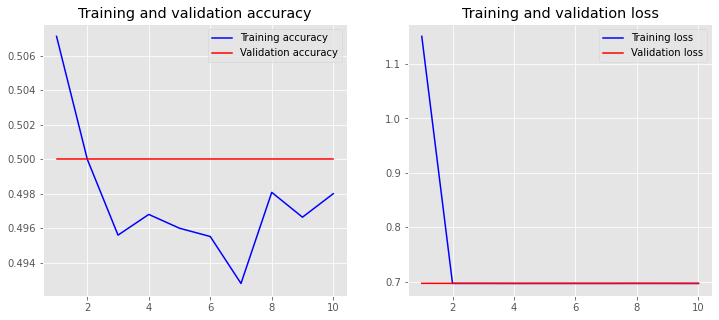

In [ ]:
plot_history(hist)

After adding a CNN layer to the model, it did not improve much and still showed signs of overfitting. We added 3 dropout layers of 25% which did not help with the overfitting either. Finally, we tried adding L1 regulaizer which resulted in dramatical improvement in the accuracy and loss.